# Plot for Positive cases/ Total tests for different India States

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter

In [2]:
# Getting the dataset
df = pd.read_csv('https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv')
df.head()

,Updated On,State,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Source1,Unnamed: 17,Source2,Test positivity rate,Tests per thousand,Tests per million,Population NCP 2019 Projection,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,17/04/2020,Andaman and Nicobar Islands,1403.0,Samples Sent,12.0,1210.0,181.0,NaN,NaN,NaN,...,https://t.me/indiacovid/2550,NaN,NaN,0.86%,3.53,3534.0,397000.0,NaN,NaN,NaN
1,24/04/2020,Andaman and Nicobar Islands,2679.0,Samples Sent,27.0,NaN,246.0,NaN,614.0,NaN,...,https://t.me/indiacovid/3147?single,NaN,NaN,1.01%,6.75,6748.0,397000.0,NaN,1000.0,1000000.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,Samples Sent,33.0,NaN,106.0,NaN,724.0,NaN,...,https://t.me/indiacovid/3365?single,NaN,NaN,1.16%,7.17,7174.0,397000.0,NaN,NaN,NaN
3,01/05/2020,Andaman and Nicobar Islands,3754.0,Samples Sent,33.0,NaN,199.0,NaN,643.0,Institutional,...,https://t.me/indiacovid/3781,NaN,NaN,0.88%,9.46,9456.0,397000.0,NaN,NaN,NaN
4,16/05/2020,Andaman and Nicobar Islands,6677.0,Samples Sent,33.0,NaN,136.0,NaN,16.0,Institutional,...,https://t.me/indiacovid/4925,NaN,NaN,0.49%,16.82,16819.0,397000.0,NaN,NaN,NaN


In [3]:
# Filtering the required columns
df1 = df[['Updated On','State', 'Total Tested', 'Positive']]
df1

,Updated On,State,Total Tested,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403.0,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,33.0
...,...,...,...,...
1253,16/05/2020,West Bengal,77288.0,2576.0
1254,17/05/2020,West Bengal,85956.0,2677.0
1255,18/05/2020,West Bengal,93570.0,2825.0
1256,19/05/2020,West Bengal,102282.0,2961.0


In [4]:
# Removing the rows with Nan values
df1 = df1.dropna()
df1

,Updated On,State,Total Tested,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403.0,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,33.0
...,...,...,...,...
1252,15/05/2020,West Bengal,69543.0,2461.0
1253,16/05/2020,West Bengal,77288.0,2576.0
1254,17/05/2020,West Bengal,85956.0,2677.0
1255,18/05/2020,West Bengal,93570.0,2825.0


In [5]:
# Function takes in a state and return it's dataframe with positivity rate(positve/total tests) in percent, begining from 17th April 2020 
def fetchState(State):
    
    Statedf = df1.loc[df1['State'] == State].copy()
    Statedf.loc[:, 'Test Positivity percent'] = (Statedf.loc[:, 'Positive']/ Statedf.loc[:, 'Total Tested'])*100
    
    Statedf.loc[:,'Updated On'] = pd.to_datetime(Statedf.loc[:,'Updated On'], format = '%d/%m/%Y')
    Statedf = Statedf[Statedf['Updated On'] >= datetime.strptime('15/04/2020' , '%d/%m/%Y')]

    return Statedf

In [6]:
MP  = fetchState('Madhya Pradesh')
MP.head()

,Updated On,State,Total Tested,Positive,Test Positivity percent
657,2020-04-15,Madhya Pradesh,9596.0,938.0,9.774906
658,2020-04-16,Madhya Pradesh,13492.0,1164.0,8.627335
659,2020-04-17,Madhya Pradesh,15302.0,1310.0,8.560972
660,2020-04-18,Madhya Pradesh,14978.0,1402.0,9.360395
661,2020-04-19,Madhya Pradesh,17835.0,1407.0,7.888982


In [7]:
# Function takes in list of states and plots them individally in 3 columns

def PlotStatesTestPositivity(loc):

    noc = len(loc)
    nor = math.ceil(noc/3)
    
    fig, axes = plt.subplots(nrows = nor, ncols = 3, figsize = (25,25))
    fig.suptitle('Ratio of Positive cases to Tested cases (in %) in selected states as of ' + df1.iloc[-1,0] , fontsize = 22, y= 0.94)
    plt.subplots_adjust(hspace = .4)
    
    k = 0
    for i in range(nor):
        for j in range(3):
            if k < noc:
                StateData = fetchState(loc[k])
                
                axes[i,j].plot(StateData['Updated On'], StateData['Test Positivity percent'], mfc = 'orange', marker='o', markersize = 10, linestyle = 'None')
                
                axes[i,j].set_title(loc[k] +'\n Total Tests: ' + str(int(StateData.iloc[-1,2])) + ', Total Positive: ' + str(int(StateData.iloc[-1,3])), y = 1, fontsize = 15)
                
                axes[i,j].grid(axis = 'y', alpha = 0.5)
                
                axes[i,j].get_yaxis().set_tick_params(which='minor', size=0)
                axes[i,j].get_yaxis().set_tick_params(which='minor', width=0)
    
                myFmt = DateFormatter("%d-%b")
                axes[i,j].xaxis.set_major_formatter(myFmt)
                axes[i,j].xaxis.set_major_locator(plt.MaxNLocator(7))
                
                axes[i,j].spines['top'].set_visible(False)
                axes[i,j].spines['right'].set_visible(False)
                
                k = k + 1
    
    plt.savefig('TestPositivity.png')
    
# --- Function Ends Here ---


In [8]:
list_of_states = ['Maharashtra', 'Kerala', 'Uttar Pradesh', 
                  'Delhi', 'West Bengal', 'Karnataka',
                  'Gujarat', 'Haryana', 'Madhya Pradesh',
                  'Bihar', 'Rajasthan', 'Andhra Pradesh',
                  'Tamil Nadu', 'Jammu and Kashmir', 'Assam']

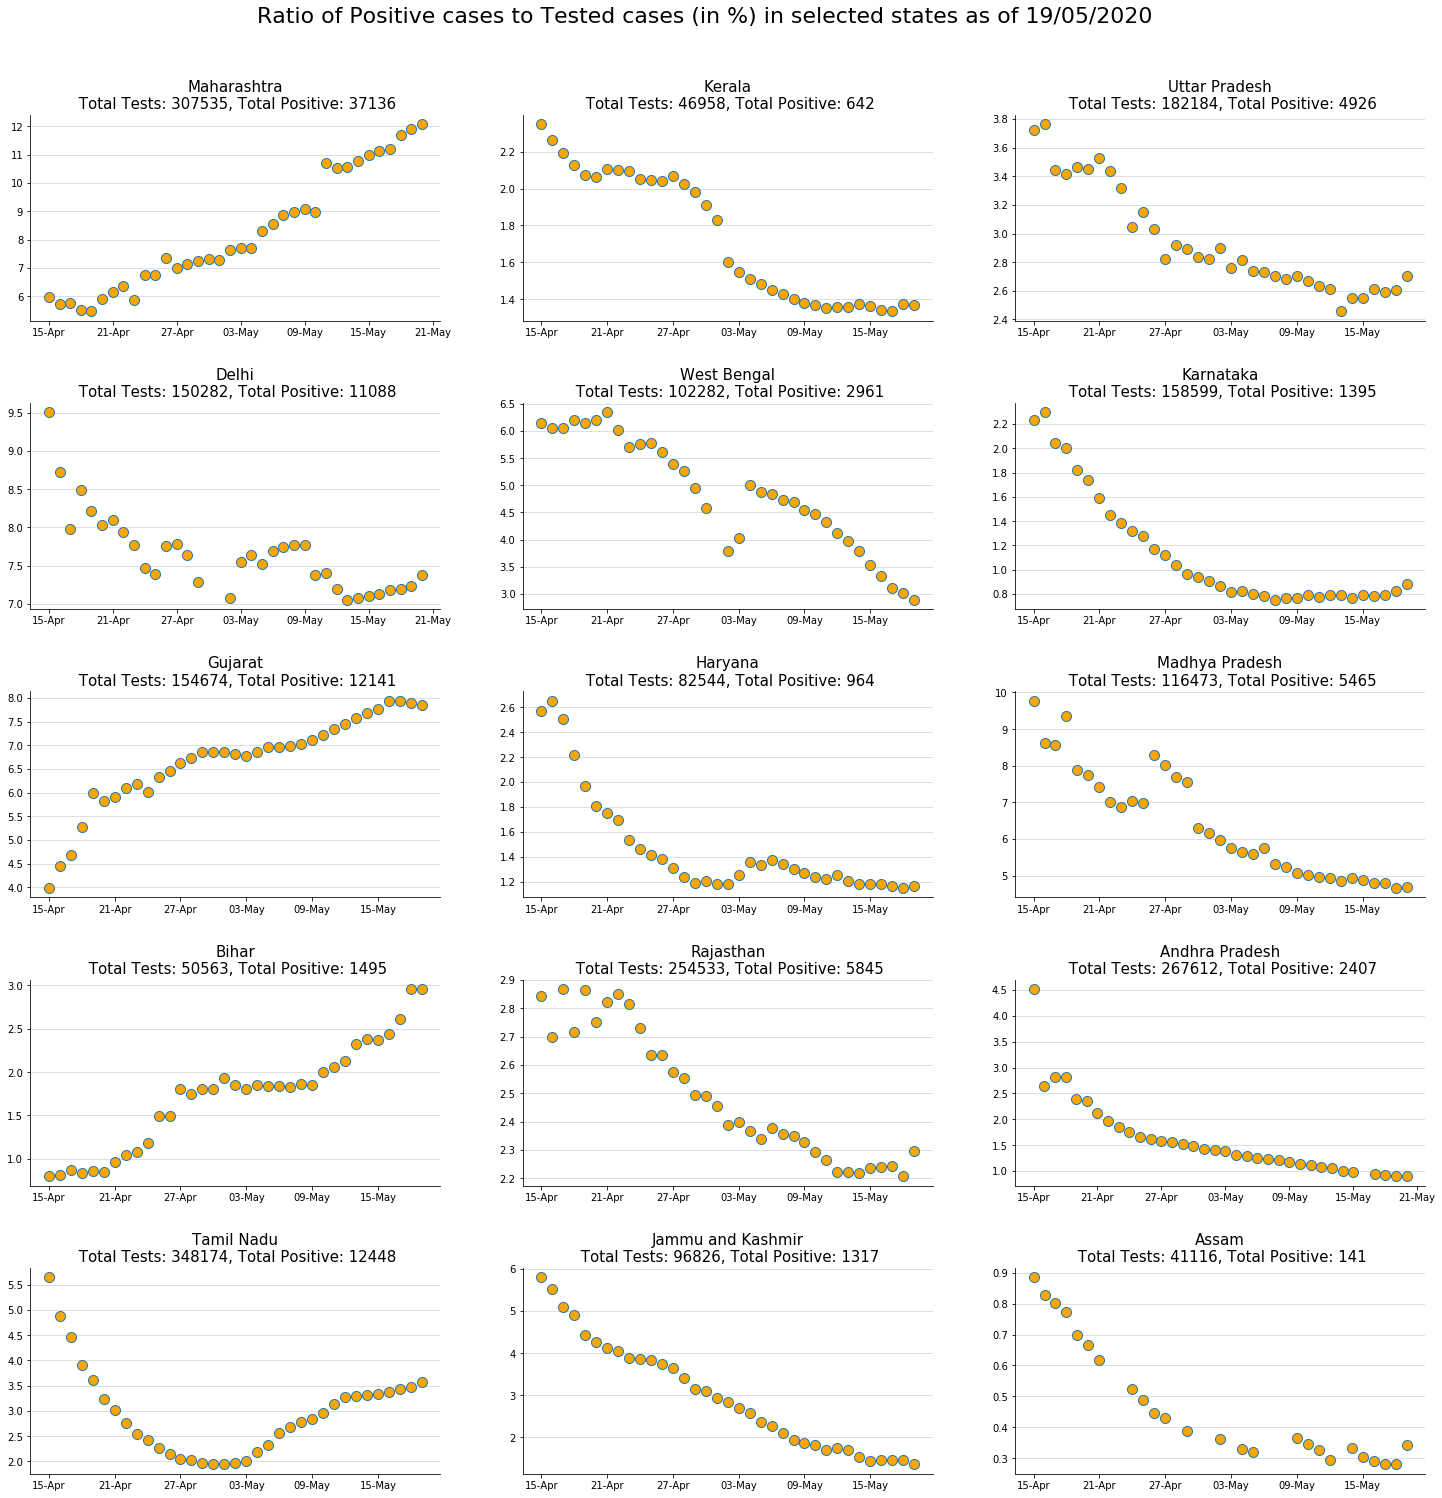

In [9]:
PlotStatesTestPositivity(list_of_states)